In [67]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import scipy
from scipy import signal

<IPython.core.display.Javascript object>


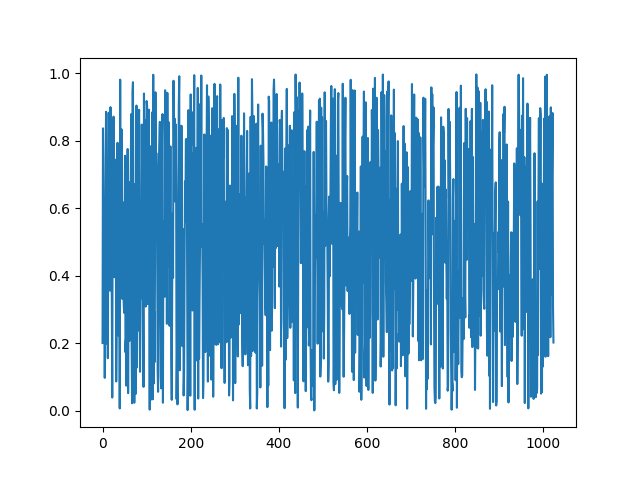

/home/gaspar/miniconda3/lib/python3.6/site-packages/numpy/core/numeric.py:531: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


In [71]:
iq = np.random.rand(1024) + np.random.rand(1024)*1j
plt.plot(iq)
plt.show()


In [69]:
def plot_spectrogram(data, fft_points):
    _, _, out = signal.spectrogram(data, 1, nperseg=fft_points, scaling='spectrum', return_onesided=False,
                                   noverlap=int(fft_points * 0.5), window='hann')
    out = np.roll(out, fft_points//2, axis=0)
    p2, p98 = np.percentile(out, (2, 98))
    from skimage.exposure import exposure
    out = exposure.rescale_intensity(out, in_range=(p2, p98))
    plt.imshow(out, interpolation='nearest', aspect='auto', origin='lower')
    plt.tight_layout()
    plt.show()

In [70]:
plot_spectrogram(iq, 64)

/home/gaspar/miniconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


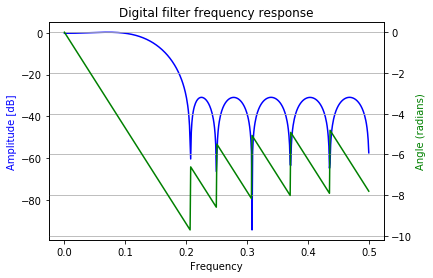

In [53]:
taps = signal.remez(16, [0, 0.1, 0.2, 0.5], [1, 0])
from pyha.common.util import plot_freqz
common.util.plot_freqz(taps)

In [54]:
iq_filtered = signal.lfilter(taps, [1.0], iq)

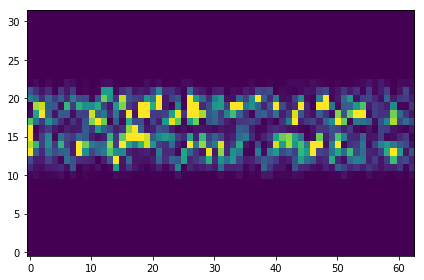

In [66]:
plot_spectrogram(iq_filtered, 64)